In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *
import pandas as pd

In [15]:
#DATA_PATH 目录下应该有train文件夹和valid文件夹 fastai 根据这两个目录的来进行train和valid
DATA_PATH = './data/'
TRAIN_DATA_PATH = DATA_PATH + 'train'
TEST_IMG_PATH = DATA_PATH + 'test'
SUBMISSION_PATH = DATA_PATH + 'submission/'

VALIDATION_RATIO = 0.16

In [16]:
train_df = pd.read_csv(DATA_PATH + 'train.csv')

In [17]:
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [18]:
train_df.Id.nunique()

5005

In [19]:
new_whale_df = train_df[train_df['Id'] == 'new_whale']

In [20]:
train_df = train_df[~(train_df['Id'] == 'new_whale')]

验证集拆分
1.每个id按找ratio进行随机获取20%的样本作为验证集合，如果随机出来的样本数小于1个，则不放入验证集
2.对于new_whale 则不存在验证集中，
3.为new_whale计算一个阈值，在最终的结果中每个验证集合有5个候选值和对应的匹配概率，new_whale 按阈值插入对应的候选匹配概率中

In [21]:
validation_filenames = []

In [22]:
count_df = train_df.groupby('Id').count().reset_index()

In [23]:
count_df.columns = ['Id', 'Count']

In [24]:
def append_validation_data(id):
    
    df = train_df[train_df['Id'] == id].reset_index()['Image']
    count = df.count()
    validation_size = count * VALIDATION_RATIO
    if validation_size >= 1:
        print('count = {0}, validation_size = {1}'.format(count, int(validation_size)))
        for i in range(0, int(validation_size)):
            validation_filenames.append(df[i])
    elif validation_size > 0 and validation_size < 1 and count > 1:
        print('count = {0}, validation_size = {1}'.format(count, 1))
        validation_filenames.append(df[0])
    else:
        print('count = {0}, validation_size = 0'.format(count))


In [25]:
count_df.apply(lambda item: append_validation_data(item.Id), axis=1)

count = 1, validation_size = 0
count = 1, validation_size = 0
count = 10, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 8, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 17, validation_size = 2
count = 11, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 5, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 5, validation_size = 1
count = 23, validation_size = 3
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 10, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 9, validation_size = 1
cou

count = 3, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 12, validation_size = 1
count = 3, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 9, validation_size = 1
count = 6, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count =

count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 6, validation_size = 1
count = 1, validation_size = 0
count = 34, validation_size = 5
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 11, validation_size = 1
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 9, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 2, validation_size = 1
count 

count = 4, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 3, validation_size = 1
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 13, validation_size = 2
count = 3, validation_size = 1
count = 13, validation_size = 2
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 10, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count

count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 5, validation_size = 1
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 15, validation_size = 2
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 8, validation_size = 1
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 4, validation_size = 1
count =

count = 2, validation_size = 1
count = 7, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 13, validation_size = 2
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 11, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 6, validation_size = 1
count = 4, validation_size = 1
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count 

count = 10, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 14, validation_size = 2
count = 7, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 8, validation_size = 1
count = 9, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 8, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 29, validation_size = 4
count = 3, validation_size = 1
count

count = 2, validation_size = 1
count = 5, validation_size = 1
count = 3, validation_size = 1
count = 6, validation_size = 1
count = 4, validation_size = 1
count = 7, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 5, validation_size = 1
count = 5, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 5, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 

count = 4, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 40, validation_size = 6
count = 8, validation_size = 1
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 3, validation_size = 1
count = 45, validation_size = 7
count = 1, validation_size = 0
count = 2, validation_size = 1
count 

count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 9, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 5, validation_size = 1
count = 1, validation_size = 0
count = 9, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 7, validation_size = 1
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 1, validation_size = 0
count = 8, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 5, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 

count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 7, validation_size = 1
count = 3, validation_size = 1
count = 10, validation_size = 1
count = 5, validation_size = 1
count = 1, validation_size = 0
count = 5, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 3, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 6, validation_size = 1
count = 2, validation_size = 1
count = 5, validation_size = 1
count =

count = 9, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 4, validation_size = 1
count = 5, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 7, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 8, validation_size = 1
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 5, validation_size = 1
count = 16, validation_size = 2
count = 2, validation_size = 1
count = 9, validation_size = 1
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count =

count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 6, validation_size = 1
count = 2, validation_size = 1
count = 12, validation_size = 1
count = 1, validation_size = 0
count = 10, validation_size = 1
count = 4, validation_size = 1
count = 24, validation_size = 3
count = 2, validation_size = 1
count = 7, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 8, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count

count = 2, validation_size = 1
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 24, validation_size = 3
count = 1, validation_size = 0
count = 8, validation_size = 1
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 12, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count 

count = 2, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 4, validation_size = 1
count = 3, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 6, validation_size = 1
count = 3, validation_size = 1
count = 3, validation_size = 1
count = 14, validation_size = 2
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 4, validation_size = 1
count = 1, validation_size = 0
count = 7, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 17, validation_size = 2
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 2, validation_size = 1
count = 4, validation_size = 1
count = 6, validation_size = 1
count = 13, validation_size = 2
count = 3, validation_size = 1
count

count = 1, validation_size = 0
count = 21, validation_size = 3
count = 6, validation_size = 1
count = 4, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 22, validation_size = 3
count = 5, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 7, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 3, validation_size = 1
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 2, validation_size = 1
count = 1, validation_size = 0
count = 1, validation_size = 0
count = 3, validation_size = 1
count 

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
4974    None
4975    None
4976    None
4977    None
4978    None
4979    None
4980    None
4981    None
4982    None
4983    None
4984    None
4985    None
4986    None
4987    None
4988    None
4989    None
4990    None
4991    None
4992    None
4993    None
4994    None
4995    None
4996    None
4997    None
4998    None
4999    None
5000    None
5001    None
5002    None
5003    None
Length: 5004, dtype: object

In [26]:
len(validation_filenames)

3273

In [27]:
BATCH_SIZE = 64
IMG_SIZE = 64
NUM_WORKERS = 8
SEED = 0

In [28]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.3)

In [29]:
data = (ImageItemList.from_df(train_df, TRAIN_DATA_PATH, cols=['Image'])
        .split_by_files(validation_filenames)\
        .label_from_df(cols='Id')\
        .transform(tfms, size = IMG_SIZE, resize_method=ResizeMethod.SQUISH)\
        .add_test(ImageItemList.from_folder('test'))\
        .databunch(bs=BATCH_SIZE, num_workers=NUM_WORKERS, path=DATA_PATH))

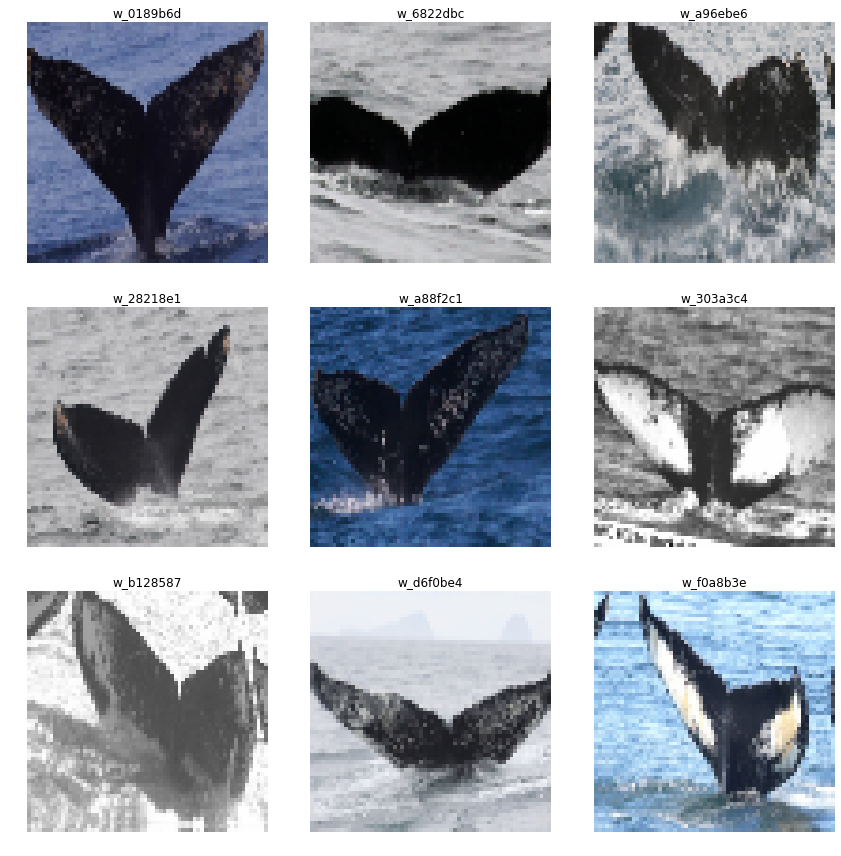

In [35]:
data.show_batch(3)

In [40]:
from utils import *

In [53]:
learn = create_cnn(data, models.resnet50,  metrics=[accuracy, map5])

In [42]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,map5
1,8.350079,8.157222,0.015277,0.024259
2,7.602509,8.062056,0.022609,0.034739


In [ ]:
learn.fit()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


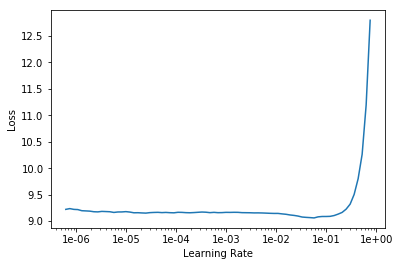

In [57]:
learn.recorder.plot()